In [1]:
import janus
import os
import timeit
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.signal import argrelmax,find_peaks,argrelmin
import imp
from scipy.sparse import csr_matrix
plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

imp.reload(janus)

<module 'janus' from '/home/zackn/snakingoscillators/janus.py'>

### A limit-cycle chimera state

runtime: 43.752950


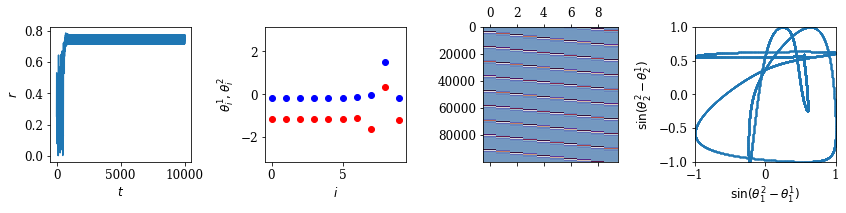

In [2]:
N=10
k=1
t1=10000
t3=9000
dt=0.01
sigma=0.35
beta=0.25
gamma=0.1
output=2
seed=1
omega=1

np.random.seed(seed)
phase_init = np.zeros(4*N,dtype=np.float64)
phi0=-np.pi+2*np.pi*np.random.random(N)
phi1=-np.pi+2*np.pi*np.random.random(N)
phase_init[:N] = np.cos(phi0)
phase_init[N:2*N] = np.sin(phi0)
phase_init[2*N:3*N] = np.cos(phi1)
phase_init[3*N:] = np.sin(phi1)

start = timeit.default_timer()
phases,times,order=janus.runsim(N, t1, t3, dt, omega, beta, sigma, gamma, phase_init)
stop = timeit.default_timer()
print('runtime: %f' % (stop - start))

phases=phases[int(t3/dt):]

phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

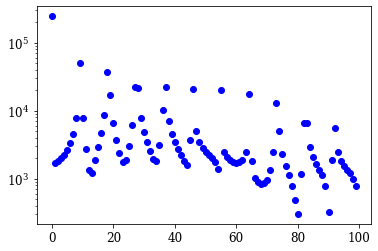

In [91]:
plt.yscale('log')
plt.plot(np.abs(np.fft.fft(phi0,axis=0))[:100,0],'bo')

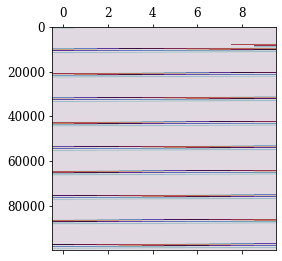

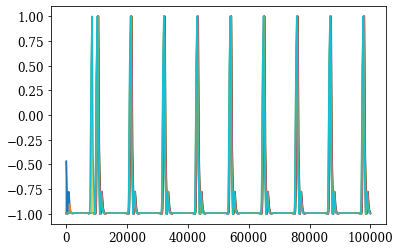

In [107]:
nu=10.5/dt
plt.matshow(np.transpose([np.cos(np.roll(phi0[:,i], 100+int(nu*i))) for i in range(N)]),aspect=len(phi0[0])/len(phi0),cmap='twilight')
plt.show()
plt.plot(np.transpose([np.cos(np.roll(phi0[:,i], 100+int(nu*i))) for i in range(N)]))
plt.show()

### A chaotic or invariant torus chimera state

runtime: 31.561605


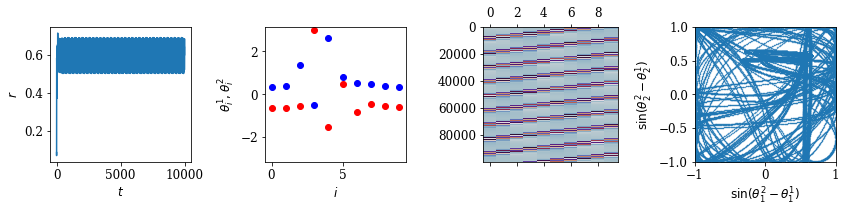

In [196]:
N=10
k=1
t1=10000
t3=9000
dt=0.01
sigma=0.35
beta=0.25
gamma=0.1
output=2
seed=9
omega=1

np.random.seed(seed)
phase_init = np.zeros(4*N,dtype=np.float64)
phi0=-np.pi+2*np.pi*np.random.random(N)
phi1=-np.pi+2*np.pi*np.random.random(N)
phase_init[:N] = np.cos(phi0)
phase_init[N:2*N] = np.sin(phi0)
phase_init[2*N:3*N] = np.cos(phi1)
phase_init[3*N:] = np.sin(phi1)

start = timeit.default_timer()
phases,times,order=janus.runsim(N, t1, t3, dt, omega, beta, sigma, gamma, phase_init)
stop = timeit.default_timer()
print('runtime: %f' % (stop - start))

phases=phases[int(t3/dt):]

phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

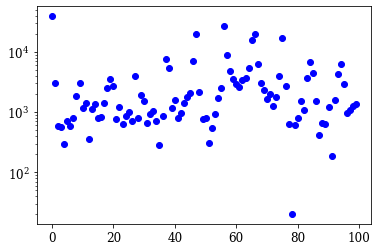

In [111]:
plt.yscale('log')
plt.plot(np.abs(np.fft.fft(phi0,axis=0))[:100,0],'bo')

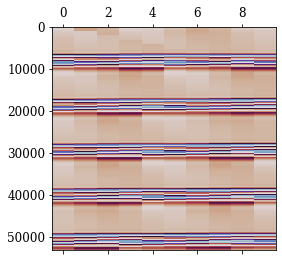

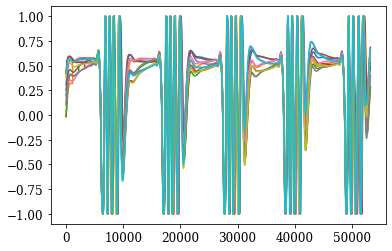

In [192]:
nmax=5*(int(len(phases)/10)+650)

phi0=np.arctan2(phases[:nmax,N:2*N],phases[:nmax,:N])
phi1=np.arctan2(phases[:nmax,3*N:],phases[:nmax,2*N:3*N])

nu=10.5/dt
plt.matshow(np.transpose([np.cos(np.roll(phi1[:,i], 100+int(nu*i))) for i in range(N)]),aspect=len(phi0[0])/len(phi0),cmap='twilight')
plt.show()
plt.plot(np.transpose([np.cos(np.roll(phi1[:,i], 100+int(nu*i))-phi0[:,0]) for i in range(N)]))
plt.show()

### The limit-cycle chimera can be found numerically as a boundary value problem

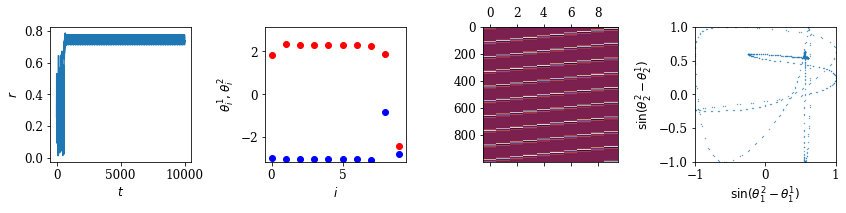

(array([ 6, 13, 20, 27, 34, 41, 48, 55, 62]),)

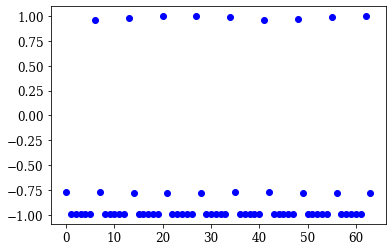

In [23]:
filebase='data/chimera/'
times=np.load(filebase+'times.npy')
order=np.load(filebase+'order.npy')
phases=np.load(filebase+'phases.npy')
fs=np.load(filebase+'fs.npy')
N=int((len(fs)+2)/4)
sigma0=0.35
omega=1
beta=0.25
gamma=0.1
phi0=np.arctan2(phases[:,N:2*N],phases[:,:N])
phi1=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])

plt.subplots(1,4,figsize=(12,3))
plt.subplot(1,4,1)
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.plot(times,order)
plt.subplot(1,4,2)
plt.xlabel('$i$')
plt.ylabel(r'$\theta_i^1, \theta_i^2$')
plt.ylim(-np.pi,np.pi)
plt.plot(phi0[-1],'bo')
plt.plot(phi1[-1],'ro')
plt.subplot(1,4,3)
ratio=N/len(phases)
plt.gca().matshow(phi1,aspect=ratio,vmin=-np.pi,vmax=np.pi,cmap='twilight_shifted')
plt.subplot(1,4,4)
plt.xlabel(r'$\sin(\theta_1^2-\theta_1^1)$')
plt.ylabel(r'$\sin(\theta_2^2-\theta_2^1)$')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(np.cos(phi1[:,0]-phi0[:,0]),np.cos(phi1[:,1]-phi0[:,1]),s=0.1)
plt.tight_layout()
plt.show()

minds=find_peaks(phases[:,0])[0]
plt.plot(phases[minds,0],'bo')
np.where(phases[minds,0]>0.9)

(40, 110) 110.0


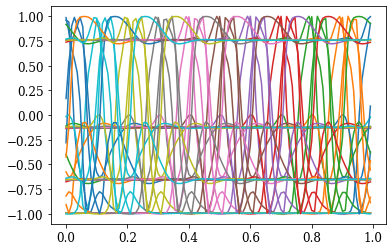

The algorithm converged to the desired accuracy. 140 59.71664606791455


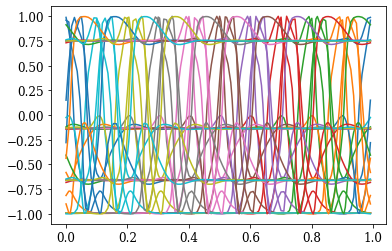

In [24]:
m0=6
m1=13
p0=times[minds[m1]]-times[minds[m0]]
Xts0=phases[minds[m0]:minds[m1]].T.copy()
ts0=(times[minds[m0]:minds[m1]]-times[minds[m0]])/p0
print(Xts0.shape,p0)
plt.plot(ts0,np.transpose(Xts0))
plt.show()

start=timeit.default_timer()
sol0=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma0, beta, gamma,sigma0,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), ts0, Xts0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)
stop=timeit.default_timer()
print(sol0.message,len(sol0.x),stop-start)
plt.plot(sol0.x,np.transpose(sol0.y))
plt.show()

### Naive continuation works. We can add bifurcation detection if we calculate Floquet exponents and continue snaking in principle.

The algorithm converged to the desired accuracy.
0.350500	5.000e-04	246	110.187949	110.665669	0.004336	23.061118	
0.351000	5.000e-04	246	110.665669	111.150137	0.004378	22.907629	
0.351500	5.000e-04	246	111.150137	111.638198	0.004391	6.070150	
0.352000	5.000e-04	246	111.638198	112.140361	0.004498	21.900265	
0.352500	5.000e-04	246	112.140361	112.646808	0.004516	23.370367	
0.353000	5.000e-04	246	112.646808	113.161201	0.004566	17.599589	
0.353500	5.000e-04	247	113.161201	113.683939	0.004619	23.887475	
0.354000	5.000e-04	247	113.683939	114.213564	0.004659	11.901998	
0.354500	5.000e-04	247	114.213564	114.752113	0.004715	5.824640	
0.355000	1.000e-03	251	114.752113	115.307650	0.004841	59.344152	
0.356000	1.000e-03	254	115.307650	116.440004	0.009820	74.070339	
0.357000	1.000e-03	254	116.440004	117.615131	0.010092	24.459912	
0.358000	1.000e-03	257	117.615131	118.840461	0.010418	51.168027	
0.359000	1.000e-03	257	118.840461	120.119794	0.010765	24.435575	
0.360000	1.000e-03	295	120.119794	121.46922

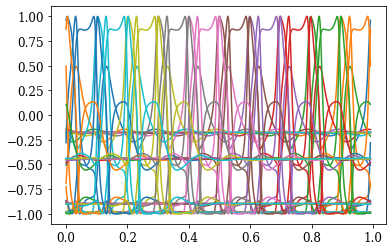

In [35]:
sols=[]
sigmas=[]
start=timeit.default_timer()

x0=sol0.x.copy()
y0=sol0.y.copy()
p0=sol0.p[0]
sigma=sigma0
sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)
print(sol.message)
sols.append(sol)
sigmas.append(sigma)

dsigma=5e-4
dsigmamax=1e-3
dsigmamin=1e-6
sigmamin=0.325
sigmamax=0.373
count=1

while sol.success and sigma<sigmamax and sigma>sigmamin:
    #We could update the initial Xts and ts with an estimate based on Jacobian and dsigma (freezing the ts to the Xts value some way)
    sigma=sigma+dsigma 
    if(sigma>sigmamax):
        sigma=sigmamax
    if(sigma<sigmamin):
        sigma=sigmamin
    
    try:
        start2=timeit.default_timer()
        sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)
        stop2=timeit.default_timer()

        if not sol.success:
            count=0
            raise Exception(sol.message)
        count=count+1
        if len(sol.x)>2*len(sols[-1].x):
            raise Exception('mesh increased too fast '+str(len(sol.x))+' '+str(len(sols[-1].x)))
        if (np.abs(np.max(y0)-np.max(sol.y))/np.max(y0)>5e-1):
            raise Exception('solution changed too much')
        if (np.abs((p0-sol.p[0])/p0)>5e-1):
            raise Exception('period changed too much '+ str(p0)+' '+str(sol.p[0]))
            
    except Exception as e:
        print('\n',str(e))
        sigma=sigma-dsigma
        dsigma=dsigma/2
        sol=sols[-1]
        print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

        if np.abs(dsigma)>dsigmamin:
            continue
        else:
            print('\nstep size too small')
            break
            
    sols.append(sol)
    sigmas.append(sigma)
    x0=sol.x
    y0=sol.y
    p0=sol.p[0]
    #Detect if it is time to turn around, and adjust p[0] if so
            
    if count>10:
        dsigma=np.sign(dsigma)*np.min([dsigmamax,np.abs(dsigma)*2])
        count=1
    print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

    
stop=timeit.default_timer()
print('\n',sol.message,len(sols),len(sols[0].x),len(sols[-1].x),stop-start)
plt.plot(sol.x,np.transpose(sol.y))
plt.show()

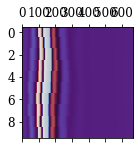

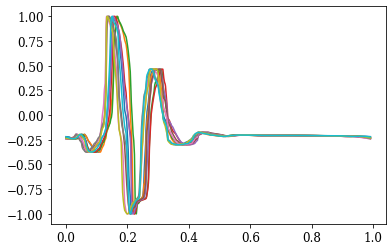

In [36]:
phases=sols[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.matshow([np.cos(np.roll(theta[:,i], 100+int(len(theta)/N*i))) for i in range(N)],aspect=len(phi)/len(phi[0]),cmap='twilight')
plt.show()
plt.plot(sols[-1].x,np.transpose([np.cos(np.roll(theta[:,i], 100+int(len(theta)/N*i))) for i in range(N)]))
plt.show()

The algorithm converged to the desired accuracy.
0.349500	-5.000e-04	246	110.187949	109.717274	0.004272	23.041927	
0.349000	-5.000e-04	246	109.717274	109.252929	0.004232	23.062697	
0.348500	-5.000e-04	246	109.252929	108.794610	0.004195	23.413282	
0.348000	-5.000e-04	246	108.794610	108.342171	0.004159	23.452338	
0.347500	-5.000e-04	246	108.342171	107.895350	0.004124	19.118163	
0.347000	-5.000e-04	246	107.895350	107.453974	0.004091	11.985558	
0.346500	-5.000e-04	246	107.453974	107.016205	0.004074	6.134169	
0.346000	-5.000e-04	246	107.016205	106.585260	0.004027	5.820949	
0.345500	-5.000e-04	246	106.585260	106.159300	0.003996	5.990359	
0.345000	-1.000e-03	246	106.159300	105.738178	0.003967	5.172040	
0.344000	-1.000e-03	246	105.738178	104.911742	0.007816	17.857790	
0.343000	-1.000e-03	246	104.911742	104.101141	0.007726	24.359115	
0.342000	-1.000e-03	246	104.101141	103.305853	0.007640	24.013064	
0.341000	-1.000e-03	246	103.305853	102.529122	0.007519	6.475291	
0.340000	-1.000e-03	246	102.5291

0.250047	-7.813e-06	651	47.163186	47.159722	0.000073	34.187131	
0.250039	-7.813e-06	651	47.159722	47.156014	0.000079	35.736938	
0.250031	-7.813e-06	651	47.156014	47.151874	0.000088	34.215655	
0.250023	-7.813e-06	651	47.151874	47.147637	0.000090	39.455423	
0.250016	-1.563e-05	651	47.147637	47.143045	0.000097	34.717711	
0.250000	-1.563e-05	651	47.143045	47.133296	0.000207	7.934579	
0.250000	-1.563e-05	651	47.133296	47.133314	0.000000	34.304926	

 The algorithm converged to the desired accuracy. 130 246 651 3844.4031704289373


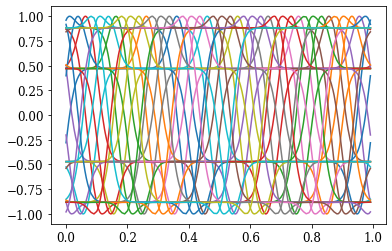

In [37]:
sols2=[]
sigmas2=[]
start=timeit.default_timer()

x0=sol0.x.copy()
y0=sol0.y.copy()
p0=sol0.p[0]
sigma=sigma0
sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)
print(sol.message)

dsigma=-5e-4
dsigmamax=1e-3
dsigmamin=1e-6
sigmamin=0.25
sigmamax=0.373
count=1

while sol.success and sigma<sigmamax and sigma>sigmamin:
    #We could update the initial Xts and ts with an estimate based on Jacobian and dsigma (freezing the ts to the Xts value some way)
    sols2.append(sol)
    sigmas2.append(sigma)
    sigma=sigma+dsigma 
    if(sigma>sigmamax):
        sigma=sigmamax
    if(sigma<sigmamin):
        sigma=sigmamin
    
    x0=sol.x.copy()
    y0=sol.y.copy()
    p0=sol.p[0]
    
    try:
        start2=timeit.default_timer()
        sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)        
        stop2=timeit.default_timer()

        if not sol.success:
            count=1
            raise Exception(sol.message)
        count=count+1
        if len(sol.x)>2*len(sols2[-1].x):
            raise Exception('mesh increased too fast '+str(len(sol.x))+' '+str(len(sols[-1].x)))
        if (np.abs(np.max(y0)-np.max(sol.y))/np.max(y0)>5e-1):
            raise Exception('solution changed too much')
        if (np.abs((p0-sol.p[0])/p0)>5e-1):
            raise Exception('period changed too much '+ str(p0)+' '+str(sol.p[0]))
    except Exception as e:
        print('\n',str(e))
        sigma=sigma-dsigma
        dsigma=dsigma/2
        sol=sols2[-1]
        print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

        if np.abs(dsigma)>dsigmamin:
            continue
        else:
            print('\nstep size too small')
            break
            
    if count>10:
        dsigma=np.sign(dsigma)*np.min([dsigmamax,np.abs(dsigma)*2])
        count=1
    print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

    
stop=timeit.default_timer()
print('\n',sol.message,len(sols2),len(sols2[0].x),len(sols2[-1].x),stop-start)
plt.plot(sol.x,np.transpose(sol.y))
plt.show()

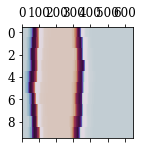

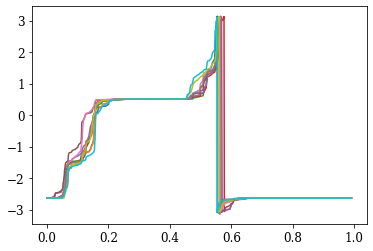

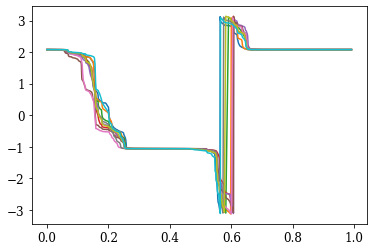

In [39]:
phases=sols2[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
plt.matshow([np.cos(np.roll(theta[:,i], 100+int(len(theta)/N*i))) for i in range(N)],aspect=len(phi)/len(phi[0]),cmap='twilight')
plt.show()
plt.plot(sols2[-1].x, np.transpose([np.roll(theta[:,i], 100+int(len(theta)/N*i)) for i in range(N)]))
plt.show()
plt.plot(sols2[-1].x, np.transpose([np.roll(phi[:,i], 100+int(len(theta)/N*i)) for i in range(N)]))
plt.show()

In [40]:
Sigmas=[sigmas2[-i] for i in range(1,len(sols2))]+[sigmas[i] for i in range(len(sols))]
Periods=[sols2[-i].p[0] for i in range(1,len(sols2))]+[sols[i].p[0] for i in range(len(sols))]
Ts=[sols2[-i].x for i in range(1,len(sols2))]+[sols[i].x for i in range(len(sols))]
Ys=[sols2[-i].y for i in range(1,len(sols2))]+[sols[i].y for i in range(len(sols))]
np.save(filebase+'lcsigmas.npy',Sigmas)
np.save(filebase+'lcperiods.npy',Periods)
for i in range(len(Sigmas)):
    np.save(filebase+'lctimes_'+str(i)+'.npy',Ts[i])
    np.save(filebase+'lcphases_'+str(i)+'.npy',Ys[i])

### Plot order parameter

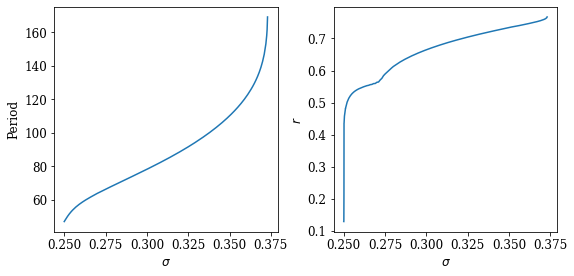

In [41]:
filebase='data/chimera/'
Sigmas=np.load(filebase+'lcsigmas.npy')
Periods=np.load(filebase+'lcperiods.npy')
Ts=[]
Ys=[]
for i in range(len(Sigmas)):
    Ts.append(np.load(filebase+'lctimes_'+str(i)+'.npy'))
    Ys.append(np.load(filebase+'lcphases_'+str(i)+'.npy'))
Orders=[]
for i in range(len(Ys)):
    phases=Ys[i].T.copy()
    phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
    theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
    r=np.abs(np.sum(phases[:,:N]+1j*phases[:,N:2*N],axis=1)+np.sum(phases[:,2*N:3*N]+1j*phases[:,3*N:],axis=1))/(2*N)
    Orders.append(np.sum(r[:-1]*np.diff(Ts[i])))
    
plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('$\sigma$')
plt.ylabel('Period')
plt.plot(Sigmas,Periods)
plt.subplot(1,2,2)
plt.xlabel('$\sigma$')
plt.ylabel('$r$')
plt.plot(Sigmas,Orders)

plt.tight_layout()
plt.show()

### Try to continue the solution around at the limit point by extrapolating

The algorithm converged to the desired accuracy. 617 63.737165059079416


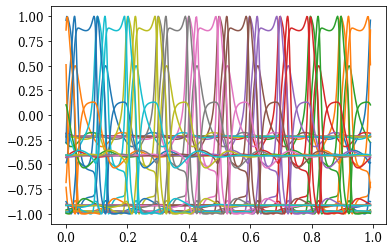

176.67382393242838 169.1731540697644 161.6724842071004 186.05999422326423


In [91]:
#Note that we should extrapolate both the period and the mesh values to improve convergence
N=int(Ys[-1].shape[0]/4)
p0=2*Periods[-1]-Periods[-2]
Xts0=2*np.array([sols[-1].sol(t) for t in Ts[-2]]).T-Ys[-2]
ts0=Ts[-2]
sigma0=Sigmas[-2]

start=timeit.default_timer()
sol0=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma0, beta, gamma,sigma0,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), ts0, Xts0, p=np.array([p0]), max_nodes=1000,tol=1e-1,bc_tol=1e-2)
stop=timeit.default_timer()
print(sol0.message,len(sol0.x),stop-start)
plt.plot(sol0.x,np.transpose(sol0.y))
plt.show()
print(p0, Periods[-1], Periods[-2], sol0.p[0])

In [142]:
sols3=[]
sigmas3=[]
start=timeit.default_timer()

x0=sol0.x.copy()
y0=sol0.y.copy()
p0=sol0.p[0]
sigma=sigma0
sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=2000,tol=1e-1,bc_tol=1e-2)
print(sol.message)

dsigma=-5e-4
dsigmamax=1e-3
dsigmamin=1e-6
sigmamin=0.3541
sigmamax=0.373
count=1

while sol.success and sigma<sigmamax and sigma>sigmamin:
    #We could update the initial Xts and ts with an estimate based on Jacobian and dsigma (freezing the ts to the Xts value some way)
    sols3.append(sol)
    sigmas3.append(sigma)
    sigma=sigma+dsigma 
    if(sigma>sigmamax):
        sigma=sigmamax
    if(sigma<sigmamin):
        sigma=sigmamin
    
    x0=sol.x.copy()
    y0=sol.y.copy()
    p0=sol.p[0]
    
    try:
        start2=timeit.default_timer()
        sol=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma, beta, gamma,sigma,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), x0, y0, p=np.array([p0]), max_nodes=2000,tol=1e-1,bc_tol=1e-2)        
        stop2=timeit.default_timer()

        if not sol.success:
            count=1
            raise Exception(sol.message)
        count=count+1
        if len(sol.x)>2*len(sols3[-1].x):
            raise Exception('mesh increased too fast '+str(len(sol.x))+' '+str(len(sols[-1].x)))
        if (np.abs(np.max(y0)-np.max(sol.y))/np.max(y0)>5e-1):
            raise Exception('solution changed too much')
        if (np.abs((p0-sol.p[0])/p0)>5e-1):
            raise Exception('period changed too much '+ str(p0)+' '+str(sol.p[0]))
    except Exception as e:
        print('\n',str(e))
        sigma=sigma-dsigma
        dsigma=dsigma/2
        sol=sols3[-1]
        print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

        if np.abs(dsigma)>dsigmamin:
            continue
        else:
            print('\nstep size too small')
            break
            
    if count>10:
        dsigma=np.sign(dsigma)*np.min([dsigmamax,np.abs(dsigma)*2])
        count=1
    print('\r%f\t%.3e\t%i\t%f\t%f\t%f\t%f\t'%(sigma, dsigma,len(sol.x),p0,sol.p[0],np.abs((p0-sol.p[0])/p0),stop2-start2),end='\n')

    
stop=timeit.default_timer()
print('\n',sol.message,len(sols3),len(sols3[0].x),len(sols3[-1].x),stop-start)
plt.plot(sol.x,np.transpose(sol.y))
plt.show()

The algorithm converged to the desired accuracy.
0.372250	-5.000e-04	617	186.025720	197.034463	0.059179	31.723527	
0.371750	-5.000e-04	630	197.034463	205.940263	0.045199	67.885354	
0.371250	-5.000e-04	631	205.940263	213.933741	0.038815	68.922655	
0.370750	-5.000e-04	631	213.933741	221.522717	0.035473	35.601462	
0.370250	-5.000e-04	631	221.522717	228.763854	0.032688	34.361862	
0.369750	-5.000e-04	634	228.763854	235.926063	0.031308	97.896095	
0.369250	-5.000e-04	635	235.926063	242.923386	0.029659	69.882379	
0.368750	-5.000e-04	1269	242.923386	249.770452	0.028186	48.831920	
0.368250	-5.000e-04	1269	249.770452	256.684502	0.027682	48.606736	
0.367750	-1.000e-03	1269	256.684502	263.498418	0.026546	64.568429	
0.366750	-1.000e-03	1269	263.498418	277.288902	0.052336	64.427587	
0.365750	-1.000e-03	1269	277.288902	291.289915	0.050493	64.224668	
0.364750	-1.000e-03	1269	291.289915	305.600545	0.049128	69.995254	
0.363750	-1.000e-03	1269	305.600545	320.365908	0.048316	64.368898	
0.362750	-1.000e-03	

/home/zackn/snakingoscillators/janus.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigmat = sigma0 + (sigma - sigma0) * t / t0



 The maximum number of mesh nodes is exceeded.
0.354063	-1.563e-05	1284	592.048840	592.048840	0.000000	231.883994	


KeyboardInterrupt: 

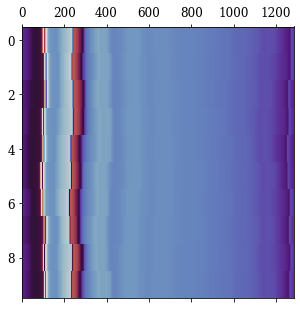

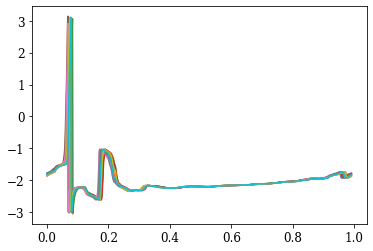

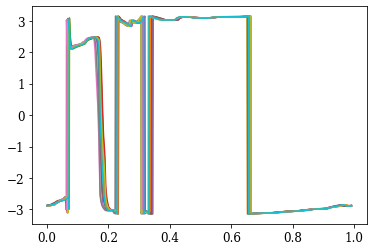

In [143]:
phases=sols3[-1].y.T.copy()
phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
fig=plt.figure(figsize=(5,5))
plt.gca().matshow([np.cos(np.roll(theta[:,i], 100+int(len(theta)/N*i))) for i in range(N)],aspect=len(phi)/len(phi[0]),cmap='twilight')
plt.show()
plt.plot(sols3[-1].x, np.transpose([np.roll(theta[:,i], 100+int(len(theta)/N*i)) for i in range(N)]))
plt.show()
plt.plot(sols3[-1].x, np.transpose([np.roll(phi[:,i], 100+int(len(theta)/N*i)) for i in range(N)]))
plt.show()

In [157]:
Sigmas=Sigmas.tolist()+[sigmas3[i] for i in range(len(sols3))]
Periods=Periods.tolist()+[sols3[i].p[0] for i in range(len(sols3))]
Ts=Ts+[sols3[i].x for i in range(len(sols3))]
Ys=Ys+[sols3[i].y for i in range(len(sols3))]
np.save(filebase+'lcsigmas.npy',Sigmas)
np.save(filebase+'lcperiods.npy',Periods)
for i in range(len(Sigmas)):
    np.save(filebase+'lctimes_'+str(i)+'.npy',Ts[i])
    np.save(filebase+'lcphases_'+str(i)+'.npy',Ys[i])

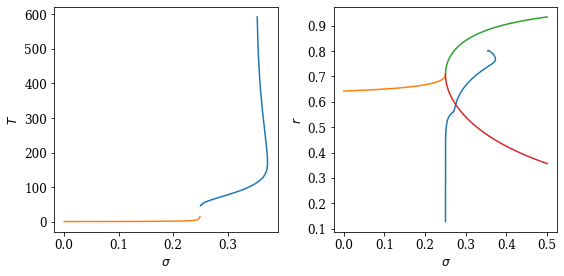

In [192]:
Orders=[]
for i in range(len(Ys)):
    phases=Ys[i].T.copy()
    phi=np.arctan2(phases[:,3*N:],phases[:,2*N:3*N])
    theta=np.arctan2(phases[:,N:2*N],phases[:,:N])
    r=np.abs(np.sum(phases[:,:N]+1j*phases[:,N:2*N],axis=1)+np.sum(phases[:,2*N:3*N]+1j*phases[:,3*N:],axis=1))/(2*N)
    Orders.append(np.sum(r[:-1]*np.diff(Ts[i])))
    
plt.subplots(1,2,figsize=(8,4))
plt.subplot(1,2,1)
plt.xlabel('$\sigma$')
plt.ylabel('$T$')
plt.plot(Sigmas,Periods)
sigmas=np.arange(0,0.25,0.001)
plt.plot(sigmas,[1/(0.75-2*sigma-4*sigma**2)**0.5 for sigma in sigmas])

plt.subplot(1,2,2)
plt.xlabel('$\sigma$')
plt.ylabel('$r$')
plt.plot(Sigmas,Orders)
sigmas=np.arange(0,0.25,0.001)
plt.plot(sigmas,[np.mean(1/(1+0.25*(1+4*sigma-((1-4*sigma)*(3+4*sigma))**0.5*np.tan(2*np.pi/(0.75-2*sigma-4*sigma**2)**0.5*np.arange(0,100)/100*0.25*((1-4*sigma)*(3+4*sigma))**0.5))**2)**0.5) for sigma in sigmas])
sigmas=np.arange(0.25,0.5,0.00001)
plt.plot(sigmas,[(2+2*(1-1/(4*(0.25+sigma)**2))**0.5)**0.5/2 for sigma in sigmas])
plt.plot(sigmas,[(2-2*(1-1/(4*(0.25+sigma)**2))**0.5)**0.5/2 for sigma in sigmas])
plt.tight_layout()
plt.savefig('diagram.pdf')
plt.show()

### Try to continue the solution around at the limit point by extrapolating again...

In [190]:
#Note that we should extrapolate both the period and the mesh values to improve convergence
N=int(Ys[-3].shape[0]/4)
p0=2*Periods[-3]-Periods[-4]
Xts0=2*np.array([sols3[-3].sol(t) for t in Ts[-4]]).T-Ys[-4]
ts0=Ts[-4]
sigma0=Sigmas[-4]

start=timeit.default_timer()
sol0=solve_bvp(lambda ts,Xts,p: p[0]*np.transpose([janus.janus(p[0]*ts[i],Xts[:,i], N, omega, sigma0, beta, gamma,sigma0,0) for i in range(len(ts))]), lambda xa,xb,p: (np.concatenate((xb-xa,[xa[0]-Xts0[0,0]]))), ts0, Xts0, p=np.array([p0]), max_nodes=5000,tol=1e-1,bc_tol=1e-2)
stop=timeit.default_timer()
print(sol0.message,len(sol0.x),stop-start)
plt.plot(sol0.x,np.transpose(sol0.y))
plt.show()
print(p0, Periods[-1], Periods[-2], sol0.p[0])

KeyboardInterrupt: 